In [1]:
%cd ..
!pwd

/users/neuron2
/users/neuron2


In [2]:
import numpy as np
import pickle as pkl
import os

import KSL_Gen.kslPreprocess as kpp
import pandas as pd
import glob

nrc = '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split'
split = '/users/neuron2/KSL_Gen/data/'
mydata = '/users/neuron2/Kinetic-GAN/NRC/preproc'

In [3]:
nrc + "*single.npy"

'/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split*single.npy'

In [4]:
nrc_npy = glob.glob(nrc + "/person*_ten.npy")
nrc_npy.sort()
nrc_npy

['/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action01_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action02_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action03_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action04_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action05_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action06_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action07_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action08_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action09_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person1_action10_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person2_action01_ten.npy',
 '/users/neuron2/Kinetic-GAN/NRC/skeleton/npy_xy_split/person2_action02_ten.npy',
 '/users/neuron2

In [63]:
metadata = pd.read_csv('/users/neuron2/Kinetic-GAN/NRC/metadata-flip.csv')
metadata

,action,person,label,start_sec,end_sec,seg_len
0,action01_single,person1,1,5,13,8
1,action01_ten,person1,1,4,84,80
2,action02_single,person1,2,4,12,8
3,action02_ten,person1,2,4,84,80
4,action03_single,person1,3,4,16,12
5,action03_ten,person1,3,4,124,120
6,action04_single,person1,4,4,16,12
7,action04_ten,person1,4,4,124,120
8,action05_single,person1,5,4,20,16
9,action05_ten,person1,5,4,164,160


In [16]:
# seglen = metadata.iloc[:,5]
# seglen = seglen[::2]
# seglen

metadata = meta

0      8
2      8
4     12
6     12
8     16
10     5
12    16
14     4
16     4
18     8
20     8
22     8
24    12
26    12
28    16
30     5
32    16
34     4
36     4
38     8
40     8
42     8
44    12
46    12
48    16
50     5
52    16
54     4
56     4
58     8
Name: seg_len, dtype: int64

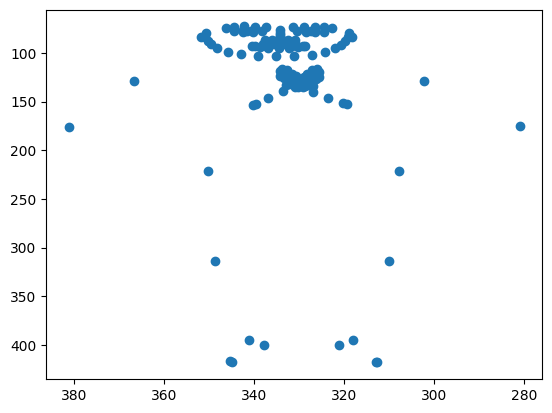

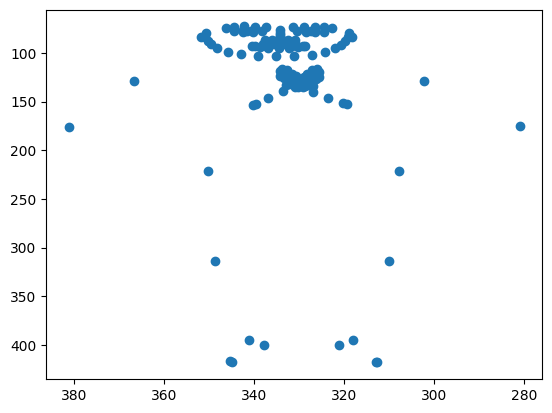

In [55]:
test = np.load(nrc_npy[0])
test.shape
test = test[1200:1260]
for data in test:
    # for l in limb_info:
    #     c1 = data[l[0]]
    #     c2 = data[l[1]]
    #     plt.plot([c1[0], c2[0]], [c1[1], c2[1]], color="red")
    
    # plt.scatter(data[:,0], data[:,1])
    # plt.xlim(0, 1)
    # plt.ylim(0, 1)
    # plt.gca().invert_xaxis()
    # plt.gca().invert_yaxis()
    # display.clear_output(wait=True)
    # display.display(plt.gcf())
    # plt.show()

    x = data[:, 0]
    y = data[:, 1]
    plt.scatter(x, y)
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.show()

### convert NRC skeleton to kinetic GAN input shape

In [56]:
lenli = []
avg = 0
for s in seglen:
    lenli.append(seglen*15)
    avg += seglen*15
lenli = np.array(lenli)

In [57]:
import matplotlib.pyplot as plt
print("frame analysis about single action")
print("avg: {}\nmin:{}\nmax:{}\nstd:{}".format(np.average(lenli), lenli.min(), lenli.max(), np.std(lenli)))
# plt.title('average length of skeleton')
# plt.bar(10, lenli)
# plt.xlabel('videos')
# print()

frame analysis about single action
avg: 139.5
min:60
max:240
std:64.3603138587748


### uniform frame length

In [58]:
framePro = kpp.FrameProcessWrapper(cutting=None, ceiling=150)
framePro.ceiling

150

In [59]:
normal=kpp.Normalization(whole=True, do=True)

In [60]:
sp = np.load(nrc_npy[0])

In [61]:
sp[0,:,0].argmax(), sp[0].min()

(7, -59.075469970703125)

In [24]:
sp = normal(sp)

In [25]:
class testNorm:
    def __init__(self, path='/dataset/KETI_SignLanguage/Keypoints-removal', whole=False, do=None):
        self.KSL_NP_PATH = path

        if whole:
            self.BODY = 91
            self.LEFT = 112
            self.RIGHT = 133
            self.keypoint_num = 133
            
            self.SKELETONS =np.concatenate(([i for i in range(self.BODY)],
                                [i for i in range(self.BODY, self.LEFT)],
                                [i for i in range(self.LEFT, self.RIGHT)]), axis=0)

        else:
            self.BODY = 7
            self.LEFT = 17
            self.RIGHT = 27
            self.keypoint_num = 27

            self.SKELETONS =np.concatenate(([0,5,6,7,8,9,10], 
                                [91,95,96,99,100,103,104,107,108,111],[112,116,117,120,121,124,125,128,129,132]), axis=0)
        
        self.do = do
        
    def __call__(self, video):
        if self.do is None:
            return video

        try:

            # video = video[:,self.SKELETONS,:]
            body = video[:, :self.BODY, :]
            left =video[:, self.BODY:self.LEFT, :]
            right =video[:, self.LEFT:self.RIGHT, :]



            #Do I object - 2D normalization?
            body_min_x= np.min(body[:,:,0])
            body_min_y= np.min(body[:,:,1])
            body_max_x= np.max(body[:,:,0])
            body_max_y= np.max(body[:,:,1])

            left_min_x = np.min(left[:,:,0])
            left_min_y = np.min(left[:,:,1])
            left_max_x = np.max(left[:,:,0])
            left_max_y = np.max(left[:,:,1])

            right_min_x = np.min(right[:,:,0])
            right_min_y = np.min(right[:,:,1])
            right_max_x = np.max(right[:,:,0])
            right_max_y = np.max(right[:,:,1])


            video[:, :self.BODY, 0] = (body[:,:,0] - body_min_x) / (body_max_x - body_min_x + 0.000001)
            video[:, :self.BODY, 1] = (body[:,:,1] - body_min_y) / (body_max_y - body_min_y + 0.000001)


            video[:, self.BODY:self.LEFT, 0] = (left[:,:,0] - left_min_x) / (left_max_x - left_min_x + 0.000001)
            video[:, self.BODY:self.LEFT, 1] = (left[:,:,1] - left_min_y) / (left_max_y - left_min_y + 0.000001)

            video[:, self.LEFT:self.RIGHT, 0] = (right[:,:,0] - right_min_x) / (right_max_x - right_min_x + 0.000001)
            video[:, self.LEFT:self.RIGHT, 1] = (right[:,:,1] - right_min_y) / (right_max_y - right_min_y + 0.000001)
           
            return video
    
        except:
            print('There is something error')
            return video

In [26]:
norm = testNorm(whole=True, do=True)

### make Dataset & label

In [62]:
keypoint = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 95, 111, 116, 132]

In [28]:
trainSet = []
trainName = []
trainLabel = []

for t, s in zip(nrc_npy, seglen):
    kp = np.load(t)#frame kp xy
    

    for r in range(0,10):
        sp = framePro.doPreProc(kp[s*15*r:s*15*(r+1), :])
        sp = norm(sp)
        sp = sp[:, keypoint]
        
        # import matplotlib.pyplot as plt
        # from IPython import display

        # for data in sp:

        #     x = data[:, 0]
        #     y = data[:, 1]
        #     plt.scatter(x, y)
        #     plt.gca().invert_xaxis()
        #     plt.gca().invert_yaxis()
        #     display.clear_output(wait=True)
        #     display.display(plt.gcf())
        #     plt.show()

        # break
        sp = np.transpose(sp, (2, 0, 1))
        sp = np.expand_dims(sp, axis=-1)
        trainSet.append(sp)

        t_name = t.split('/')[-1][:-4] + '{0:02d}'.format(r) + '.npy'
        trainName.append(t_name)
        trainLabel.append(int(t_name.split('_')[1][-2:])-1)

trainSet = np.array(trainSet, dtype=np.float64)
trainMeta = tuple([trainName, trainLabel])

In [29]:
t1 = np.array([[i for i in range(133)],[i for i in range(133)], [i for i in range(133)]])
t2 = t1[:,keypoint]
t2

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  20,  21,  95, 111, 116, 132],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  20,  21,  95, 111, 116, 132],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  20,  21,  95, 111, 116, 132]])

In [30]:
trainSet.shape, trainSet[0].shape, trainLabel[::30]

((300, 2, 150, 25, 1), (2, 150, 25, 1), [0, 3, 6, 9, 2, 5, 8, 1, 4, 7])

In [31]:
trainSet[0].max(), trainSet[0].min()

(0.9719990374443889, 0.0)

In [32]:
np.save(os.path.join(mydata, 'train_data.npy'), trainSet)

with open(os.path.join(mydata, 'train_label.pkl'), 'wb') as f:
    pkl.dump(trainMeta, f)

In [33]:
with open(os.path.join(mydata, 'train_label.pkl'), 'rb') as f:
    tm = pkl.load(f)

In [34]:
tm[0][::30], tm[1][::30]

(['person1_action01_ten00.npy',
  'person1_action04_ten00.npy',
  'person1_action07_ten00.npy',
  'person1_action10_ten00.npy',
  'person2_action03_ten00.npy',
  'person2_action06_ten00.npy',
  'person2_action09_ten00.npy',
  'person3_action02_ten00.npy',
  'person3_action05_ten00.npy',
  'person3_action08_ten00.npy'],
 [0, 3, 6, 9, 2, 5, 8, 1, 4, 7])

### check plots

In [35]:
import matplotlib.pyplot as plt
import scipy.io

mat_file_name =  "/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp9/plot_loss.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [36]:
d_loss = mat_file['d_loss']
g_loss = mat_file['g_loss']
g_loss.shape, d_loss.shape

((1, 10800), (1, 10800))

In [37]:
xmin = 0
ymin = min(min(d_loss[0]), min(g_loss[0]))
ymax = max(max(d_loss[0]), max(g_loss[0]))
ymin,ymax

(-305.1986, 136.19943)

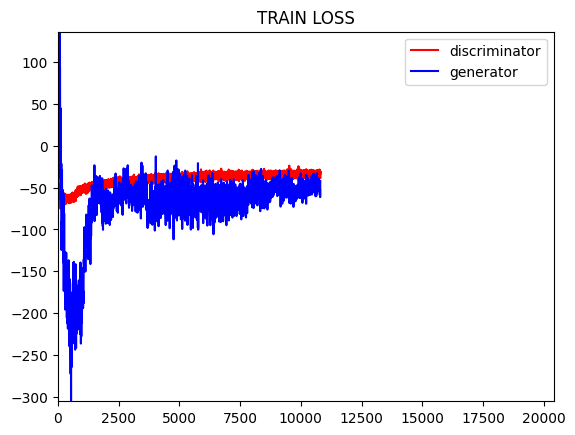

In [38]:
plt.title("TRAIN LOSS")
plt.axis([0, 20400, ymin, ymax])
plt.plot(d_loss[0], label="discriminator", color='red')
plt.plot(g_loss[0], label="generator", color="blue")
plt.legend()
plt.show()

### check synthetic data - h36m

18 19 21 22 96 112 117 133
18 19 20 21 22 23  24  25
17 18 19 20 21 22  23  24

In [39]:
limb_info = [(0,1), (0,2), (1,3), (2,4),
             (0,6),(6,8),(8,10),(0,5),(5,7),(7,9),(5,6),(6,12),(5,11),
              (12,14),(11,13),(11,12),(13,15),(14,16),
               (10,23),(10,24),(9,21),(9,22),
                (16,19),(16,20),(15,17),(15,18)]

In [40]:
synth = '/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp8/actions/10000.npy'
data = np.load(synth)
sample = data[0]
sample.shape

(2, 150, 25)

In [41]:
origin = trainSet[0]
sample = origin

In [42]:
x = sample[0]
y = sample[1]

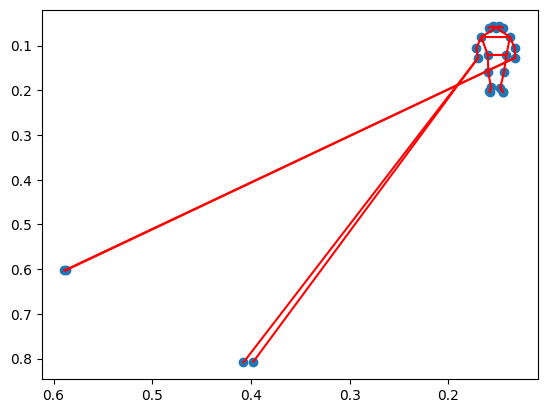

KeyboardInterrupt: 

In [45]:
import matplotlib.pyplot as plt
from IPython import display

for xc, yc in zip(x, y):
    # plt.xlim([-1, 1])      # X축의 범위: [xmin, xmax]
    # plt.ylim([-1, 1])
    for l in limb_info:
        x1 = xc[l[0]]
        x2 = xc[l[1]]
        y1 = yc[l[0]]
        y2 = yc[l[1]]
        plt.plot([x1, x2], [y1, y2], color="red")
       
    plt.scatter(xc, yc)
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.show()

In [209]:
from dtw import *
origin = np.squeeze(trainSet[0])
synth5000 = np.load('/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp8/actions/5000.npy')[0]
synth10000 = np.load('/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp8/actions/10000.npy')[0]

In [212]:
origin.shape

(50, 150)

In [211]:
from dtw import *

origin = np.transpose(origin, (1, 2, 0))
synth5000 = np.transpose(synth5000, (1, 2, 0))
synth10000 = np.transpose(synth10000, (1, 2, 0))

origin = np.transpose(origin[:,:,:2].reshape(-1, 50))
synth5000 = np.transpose(synth5000[:,:,:2].reshape(-1, 50))
synth10000 = np.transpose(synth10000[:,:,:2].reshape(-1, 50))

51.233605385847426
0.17077868461949142


<AxesSubplot:xlabel='Index', ylabel='Query value'>

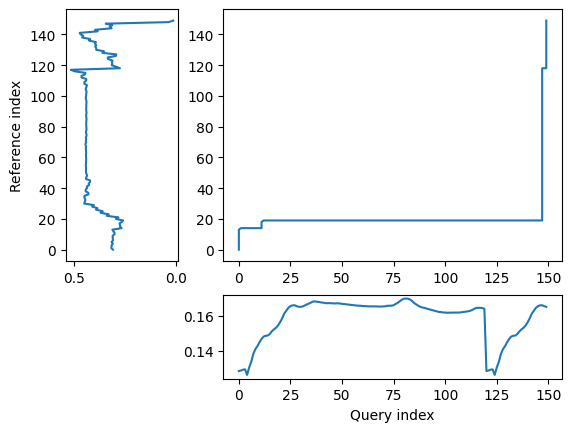

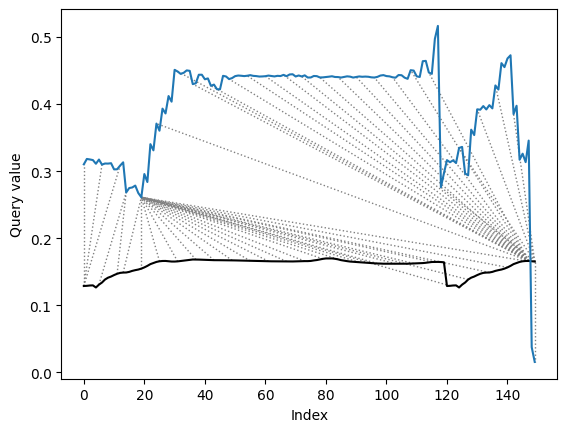

In [219]:
og = np.array(origin[10])
sy5 = np.array(synth5000[10])

alignment = dtw(og,sy5, keep_internals=True)
print(alignment.distance)
print(alignment.normalizedDistance)

alignment.plot(type="threeway")
alignment.plot(type="twoway")

35.19581925963406
0.11731939753211353


<AxesSubplot:xlabel='Index', ylabel='Query value'>

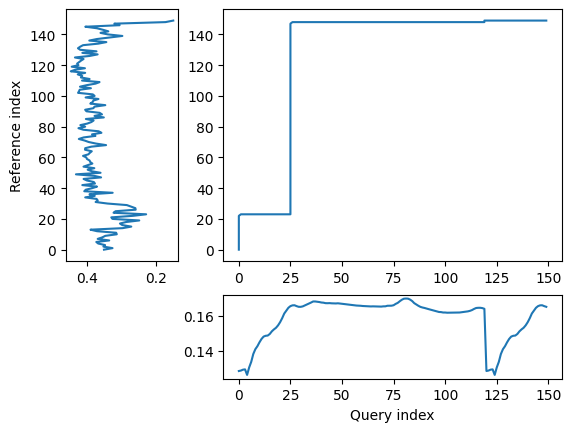

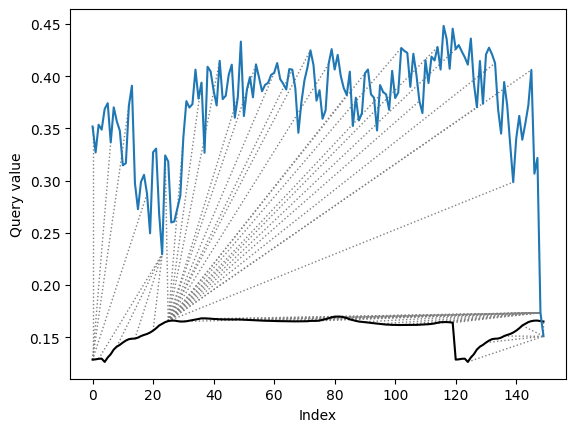

In [220]:
sy10 = np.array(synth10000[10])

alignment = dtw(og, sy10, keep_internals=True)
print(alignment.distance)
print(alignment.normalizedDistance)

alignment.plot(type="threeway")
alignment.plot(type="twoway")

4.244977205991745
0.014149924019972483


<AxesSubplot:xlabel='Index', ylabel='Query value'>

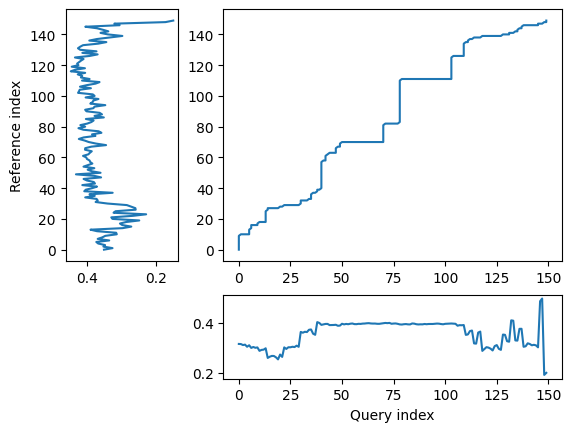

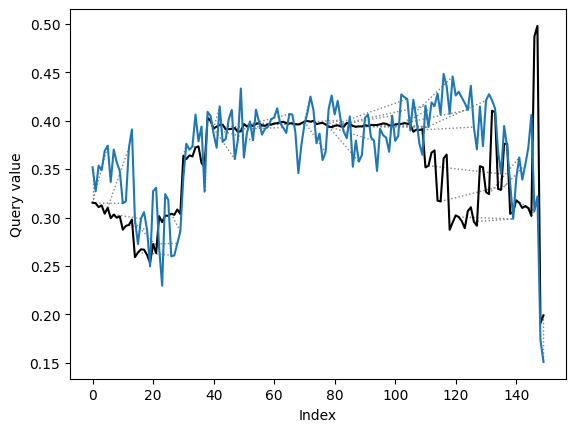

In [218]:
alignment = dtw(sy5, sy10, keep_internals=True)
print(alignment.distance)
print(alignment.normalizedDistance)

alignment.plot(type="threeway")
alignment.plot(type="twoway")